<a href="https://colab.research.google.com/github/warriorgithub/COVID19-Global-Forecasting/blob/master/COVID19_Global_Forecasting_(Week_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import reverse_geocoder as rg
import matplotlib.animation as animation
import datetime
import pycountry
import calendar

In [0]:
train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covid19/covid19-global-forecasting-week-1/train.csv')

In [0]:
train_df.head()

Id Province/State Country/Region  ...        Date  ConfirmedCases Fatalities
0   1            NaN    Afghanistan  ...  2020-01-22             0.0        0.0
1   2            NaN    Afghanistan  ...  2020-01-23             0.0        0.0
2   3            NaN    Afghanistan  ...  2020-01-24             0.0        0.0
3   4            NaN    Afghanistan  ...  2020-01-25             0.0        0.0
4   5            NaN    Afghanistan  ...  2020-01-26             0.0        0.0

[5 rows x 8 columns]

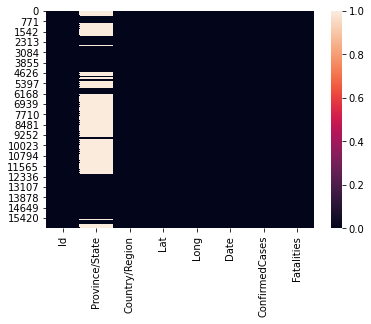

In [0]:
sns.heatmap(train_df.isnull())

In [0]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16188 entries, 0 to 16187
Data columns (total 8 columns):
Id                16188 non-null int64
Province/State    7410 non-null object
Country/Region    16188 non-null object
Lat               16188 non-null float64
Long              16188 non-null float64
Date              16188 non-null object
ConfirmedCases    16188 non-null float64
Fatalities        16188 non-null float64
dtypes: float64(4), int64(1), object(3)
memory usage: 1011.9+ KB


In [0]:
def fillNullProvince(x):
  coordinates = (x['Lat'],x['Long'])
  result =  rg.search(coordinates)
  return result[0].get('name')

In [0]:
train_df['Province/State'] = train_df.apply(lambda x:fillNullProvince(x) if pd.isnull(x['Province/State']) else x['Province/State'] ,axis=1)
train_df['Province/State'].value_counts()

Loading formatted geocoded file...


Grand Princess      114
Diamond Princess    114
Mweka               114
US                   57
Maryland             57
                   ... 
Villa Altagracia     57
Al                   57
Chisec               57
Ogre                 57
Ontario              57
Name: Province/State, Length: 281, dtype: int64

In [0]:
train_df.head()

Id Province/State Country/Region  ...        Date  ConfirmedCases Fatalities
0   1         Kajran    Afghanistan  ...  2020-01-22             0.0        0.0
1   2         Kajran    Afghanistan  ...  2020-01-23             0.0        0.0
2   3         Kajran    Afghanistan  ...  2020-01-24             0.0        0.0
3   4         Kajran    Afghanistan  ...  2020-01-25             0.0        0.0
4   5         Kajran    Afghanistan  ...  2020-01-26             0.0        0.0

[5 rows x 8 columns]

In [0]:
import geopandas as gp

In [0]:
train_df.to_csv('covid19master.csv', index=False)

NameError: ignored

In [0]:
master_df = train_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/covid19/covid19master.csv')

In [0]:
master_df['month'] = pd.DatetimeIndex(master_df['Date']).month 
master_df['month'] = master_df['month'].apply(lambda x: calendar.month_abbr[x])

In [8]:
master_df.head()

Id Province/State Country/Region  ...  ConfirmedCases  Fatalities month
0   1         Kajran    Afghanistan  ...             0.0         0.0   Jan
1   2         Kajran    Afghanistan  ...             0.0         0.0   Jan
2   3         Kajran    Afghanistan  ...             0.0         0.0   Jan
3   4         Kajran    Afghanistan  ...             0.0         0.0   Jan
4   5         Kajran    Afghanistan  ...             0.0         0.0   Jan

[5 rows x 9 columns]

In [0]:
confirmed_cases_by_country = master_df.groupby('Country/Region').max()[['ConfirmedCases','Fatalities']]
confirmed_cases_by_country.sort_values(by=['ConfirmedCases','Fatalities'],ascending=False,inplace=True)

In [10]:
confirmed_cases_by_country.head(10)

ConfirmedCases  Fatalities
Country/Region                            
China                  67800.0      3122.0
Italy                  35713.0      2978.0
Iran                   17361.0      1135.0
Spain                  13910.0       623.0
Germany                12327.0        28.0
France                  9043.0       148.0
Korea, South            8413.0        84.0
Switzerland             3028.0        28.0
United Kingdom          2626.0        71.0
US                      2495.0        55.0

In [0]:
confirmed_cases_by_country['Country'] = confirmed_cases_by_country.index

<function matplotlib.pyplot.show>

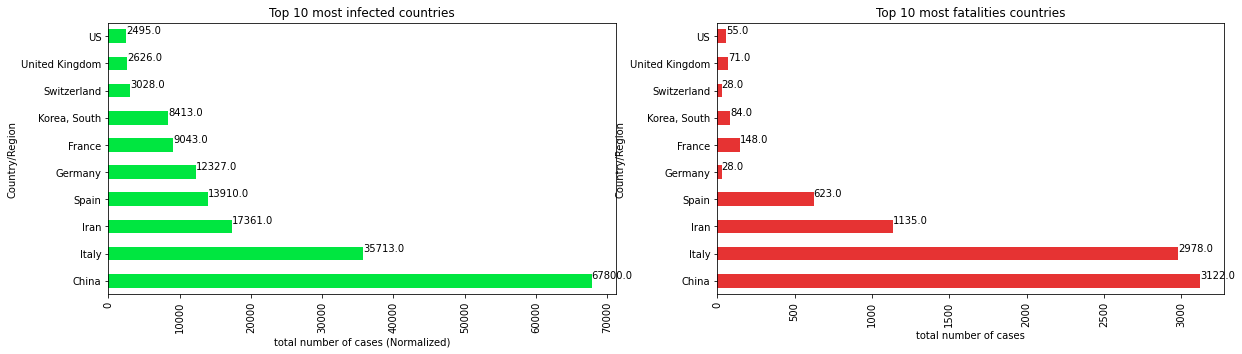

In [49]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
confirmed_cases_by_country['ConfirmedCases'].head(10).plot(kind='barh',color=(0,0.9,.25,1.0))
plt.xticks(rotation=90)
xlocs, xlabs = plt.xticks()
xlocs=[i+1 for i in range(0,10)]
xlabs=[i/2 for i in range(0,10)]
for i, v in enumerate(confirmed_cases_by_country['ConfirmedCases'].head(10)):
  plt.text(v, xlocs[i]-0.9 , str(v))
plt.xlabel('total number of cases (Normalized)')
plt.title('Top 10 most infected countries')

plt.subplot(1,2,2)
confirmed_cases_by_country['Fatalities'].head(10).plot(kind='barh',color = (0.9,0.2,0.2,1.0))
for i, v in enumerate(confirmed_cases_by_country['Fatalities'].head(10)):
  plt.text(v, xlocs[i]-0.9 , str(v))
plt.xlabel('total number of cases')
plt.title('Top 10 most fatalities countries')
plt.xticks(rotation=90)
plt.show


In [13]:
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, ColumnDataSource
from bokeh.models import HoverTool
import json
#Input GeoJSON source that contains features for plotting.
merged_json = json.loads(master_df.to_json())
json_data = json.dumps(merged_json)

geosource = GeoJSONDataSource(geojson = json_data)
#Create figure object.
p = figure(title = 'Worldwide spread of Coronavirus', plot_height = 600 , plot_width = 1050)
p.xgrid.grid_line_color = None
p.ygrid.grid_line_color = None
#Add patch renderer to figure. 
patch=p.patches(xs='xs',ys='ys', source = geosource,fill_color = '#fff7bc',
          line_color = 'black', line_width = 0.35, fill_alpha = 1, 
                hover_fill_color="#fec44f")
p.add_tools(HoverTool(tooltips=[('Country','@country'),('ConfirmedCases','@confirmedcases'), ('Fatalities','@fatalities')], renderers=[patch]))

#Display figure inline in Jupyter Notebook.
output_notebook()
#Display figure.
show(p)

In [0]:
def getAlph(input):
  countries={}
  for country in pycountry.countries:
    countries[country.name] = country.alpha_3
    codes = countries.get(input, 'Unknown code')
  return codes

In [0]:
confirmed_cases_by_country['iso_alpha'] = confirmed_cases_by_country['Country'].apply(lambda x:getAlph(x))

In [0]:
confirmed_cases_by_country['TotalConfirmedCases'] = confirmed_cases_by_country['ConfirmedCases'].pow(0.3) * 3.5

In [17]:
confirmed_cases_by_country.head()

ConfirmedCases  Fatalities  ...     iso_alpha TotalConfirmedCases
Country/Region                              ...                                  
China                  67800.0      3122.0  ...           CHN           98.500164
Italy                  35713.0      2978.0  ...           ITA           81.267321
Iran                   17361.0      1135.0  ...  Unknown code           65.454644
Spain                  13910.0       623.0  ...           ESP           61.244372
Germany                12327.0        28.0  ...           DEU           59.064327

[5 rows x 5 columns]

In [33]:
import plotly.express as px
#df = px.data.
#month = confirmed_cases_by_country['']
fig = px.scatter_geo(confirmed_cases_by_country, locations="iso_alpha",color="ConfirmedCases",
                     text='Fatalities', size="TotalConfirmedCases",
                     projection="natural earth")
fig.update_layout(
    title={
        'text': "Hover on map to get deatails about Confirmed and Fatalities cases",
        'y':1,
        'x':0.4,
        'xanchor': 'center',
        'yanchor': 'top'})
fig.show()

In [34]:
master_df.head()

Id Province/State Country/Region  ...  ConfirmedCases  Fatalities month
0   1         Kajran    Afghanistan  ...             0.0         0.0   Jan
1   2         Kajran    Afghanistan  ...             0.0         0.0   Jan
2   3         Kajran    Afghanistan  ...             0.0         0.0   Jan
3   4         Kajran    Afghanistan  ...             0.0         0.0   Jan
4   5         Kajran    Afghanistan  ...             0.0         0.0   Jan

[5 rows x 9 columns]

In [47]:
import plotly.graph_objects as go
fig = go.Figure()
fig.add_trace(go.Scatter(x=master_df.Date, y=master_df['ConfirmedCases'], name="ConfirmedCases",
                         line_color='orange'))

fig.add_trace(go.Scatter(x=master_df.Date, y=master_df['Fatalities'], name="Deaths",
                        line_color='red'))

fig.update_layout(title_text='Covid-19 Cases Confimrd and Deaths over time',xaxis_rangeslider_visible=True)
fig.show()

In [0]:
model_df = master_df[['Country/Region','ConfirmedCases','Fatalities','Date']]

In [37]:
model_df['month'] = pd.DatetimeIndex(master_df['Date']).month 
model_df['year'] = pd.DatetimeIndex(master_df['Date']).year

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [38]:
model_df.head()

Country/Region  ConfirmedCases  Fatalities        Date  month  year
0    Afghanistan             0.0         0.0  2020-01-22      1  2020
1    Afghanistan             0.0         0.0  2020-01-23      1  2020
2    Afghanistan             0.0         0.0  2020-01-24      1  2020
3    Afghanistan             0.0         0.0  2020-01-25      1  2020
4    Afghanistan             0.0         0.0  2020-01-26      1  2020

In [39]:
train_df.isnull().sum()

Id                0
Province/State    0
Country/Region    0
Lat               0
Long              0
Date              0
ConfirmedCases    0
Fatalities        0
month             0
dtype: int64

In [40]:
model_df['PositiveCases'] = model_df['ConfirmedCases'].pow(0.3) * 3.5 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



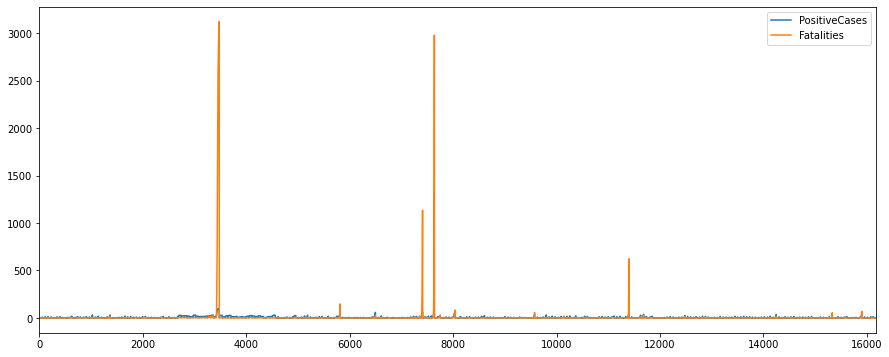

In [41]:
model_df[['PositiveCases','Fatalities']].plot(figsize=(15,6))

In [0]:
temp_df = model_df[['PositiveCases','Fatalities']]

In [0]:
temp_df.index = model_df['Date']

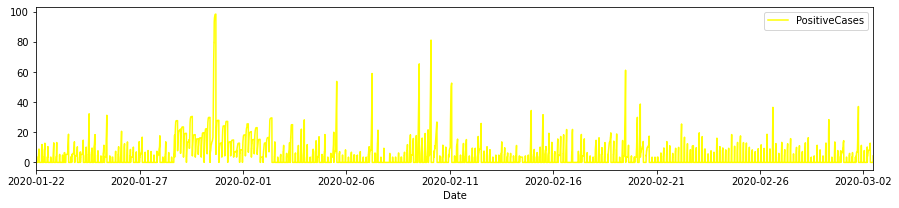

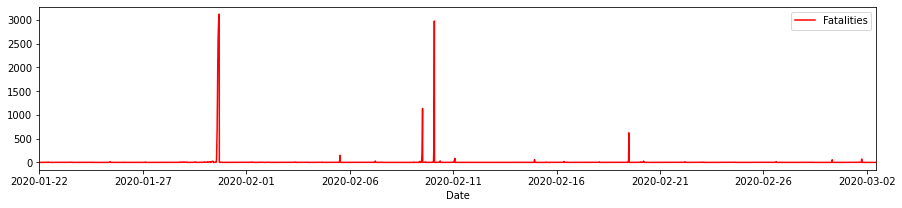

In [48]:
temp_df[['PositiveCases']].plot(figsize=(15,3),color='yellow')
temp_df[['Fatalities']].plot(figsize=(15,3),color='red')